# Exploratory Data Analysis - Telco Churn Prediction

This notebook contains the exploratory analysis of the Telco dataset for the churn prediction project.

## 1. Library Imports

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display all columns
pd.set_option('display.max_columns', None)

## 2. Data Loading

In [2]:
# Import dataset
df = pd.read_csv('../data/telco_churn_data.csv')

# View first rows
print(f"Dataset dimensions: {df.shape}")
df.head()

Dataset dimensions: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Preliminary Data Analysis

In [3]:
# General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_pct
})

missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage (%)


## 4. Target Variable Analysis (Churn)

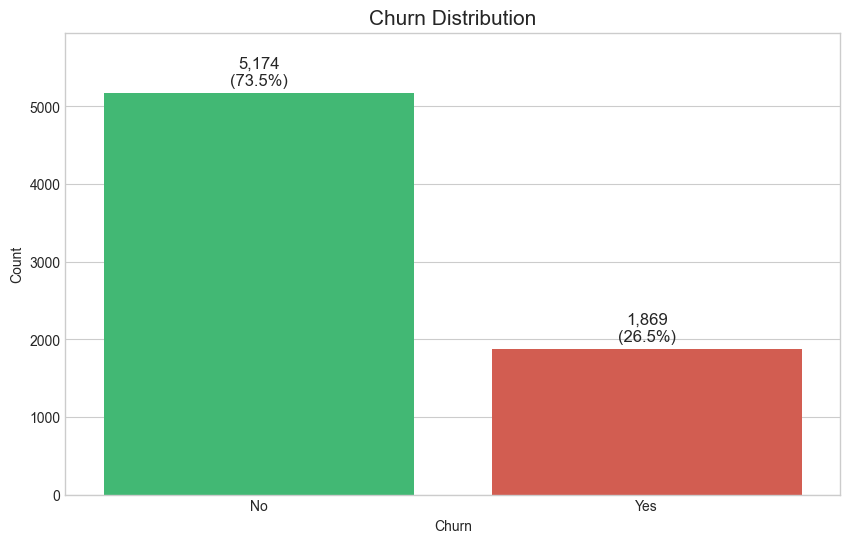

Churn Distribution:
No     5174
Yes    1869
Name: Churn, dtype: int64

Churn Percentage:
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


In [6]:
# Target variable distribution
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df, palette=['#2ecc71', '#e74c3c'])

# Add labels and percentages
for i, (count, pct) in enumerate(zip(churn_counts, churn_pct)):
    ax.text(i, count + 100, f'{count:,}\n({pct:.1f}%)', ha='center', fontsize=12)

plt.title('Churn Distribution', fontsize=15)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.ylim(0, max(churn_counts) * 1.15)
plt.show()

print(f"Churn Distribution:\n{churn_counts}\n")
print(f"Churn Percentage:\n{churn_pct}")

## 5. Categorical Variables Analysis

In [7]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID column
print(f"Categorical variables: {categorical_cols}")

Categorical variables: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


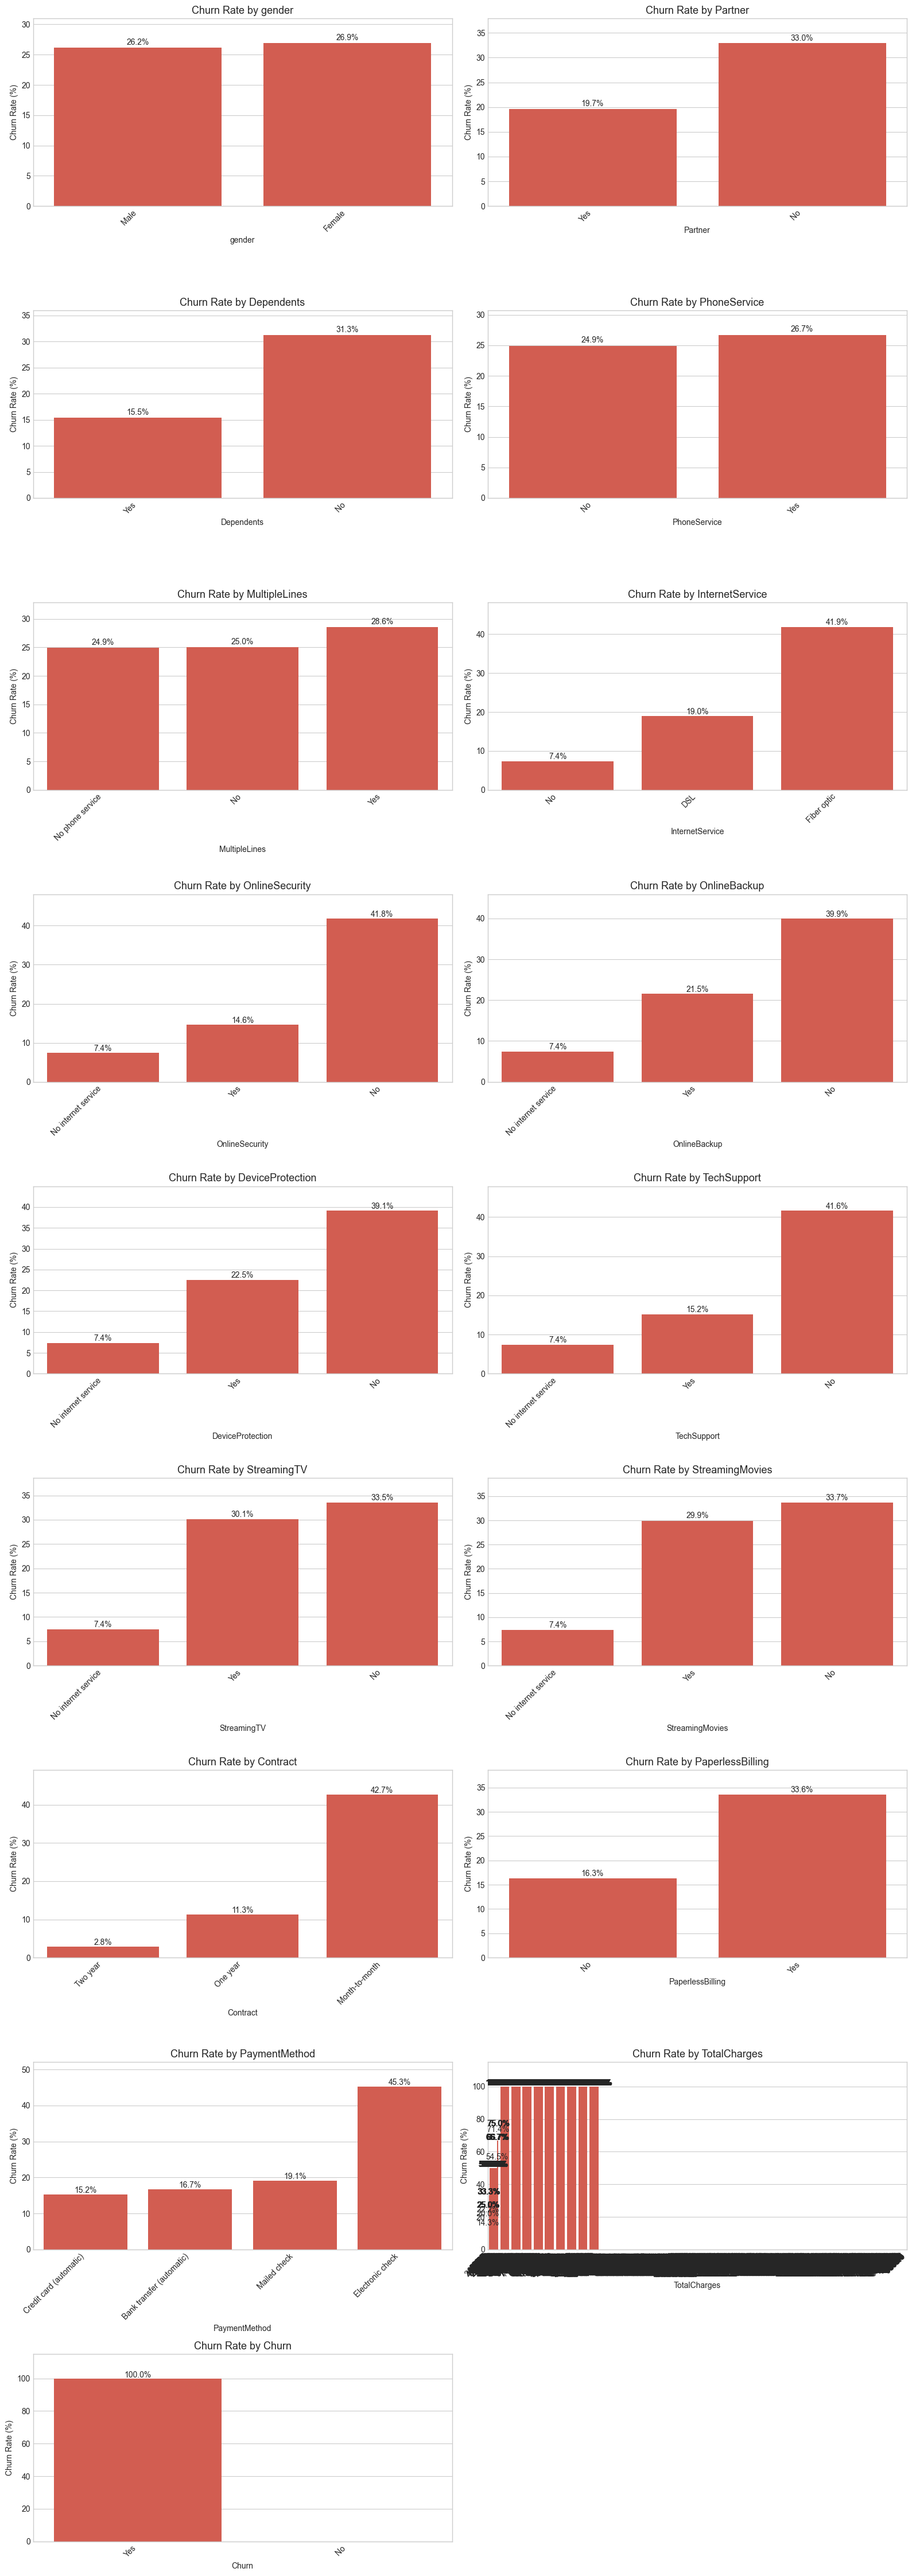

In [8]:
# Function to plot relationship between categorical variables and churn
def plot_categorical_vs_churn(dataframe, categorical_columns, ncols=2):
    nrows = (len(categorical_columns) + ncols - 1) // ncols
    plt.figure(figsize=(16, 5 * nrows))
    
    for i, col in enumerate(categorical_columns):
        ax = plt.subplot(nrows, ncols, i + 1)
        
        # Calculate churn percentage
        churn_pct = dataframe.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
        
        if 'Yes' in churn_pct.columns:
            # Sort by churn value (Yes)
            churn_pct = churn_pct.sort_values(by='Yes')
            g = sns.barplot(x=churn_pct.index, y=churn_pct['Yes'], ax=ax, color='#e74c3c')
            
            # Add values
            for p, pct in zip(g.patches, churn_pct['Yes']):
                g.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                          ha='center', fontsize=10)
            
            plt.title(f'Churn Rate by {col}', fontsize=13)
            plt.ylabel('Churn Rate (%)')
            plt.xlabel(col)
            plt.xticks(rotation=45, ha='right')
            plt.ylim(0, max(churn_pct['Yes'] * 1.15) if not churn_pct['Yes'].empty else 100)
    
    plt.tight_layout()
    plt.show()

# Plot for each categorical variable
plot_categorical_vs_churn(df, categorical_cols)

## 6. Numerical Variables Analysis

In [9]:
# Identify numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical variables: {numeric_cols}")

Numerical variables: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


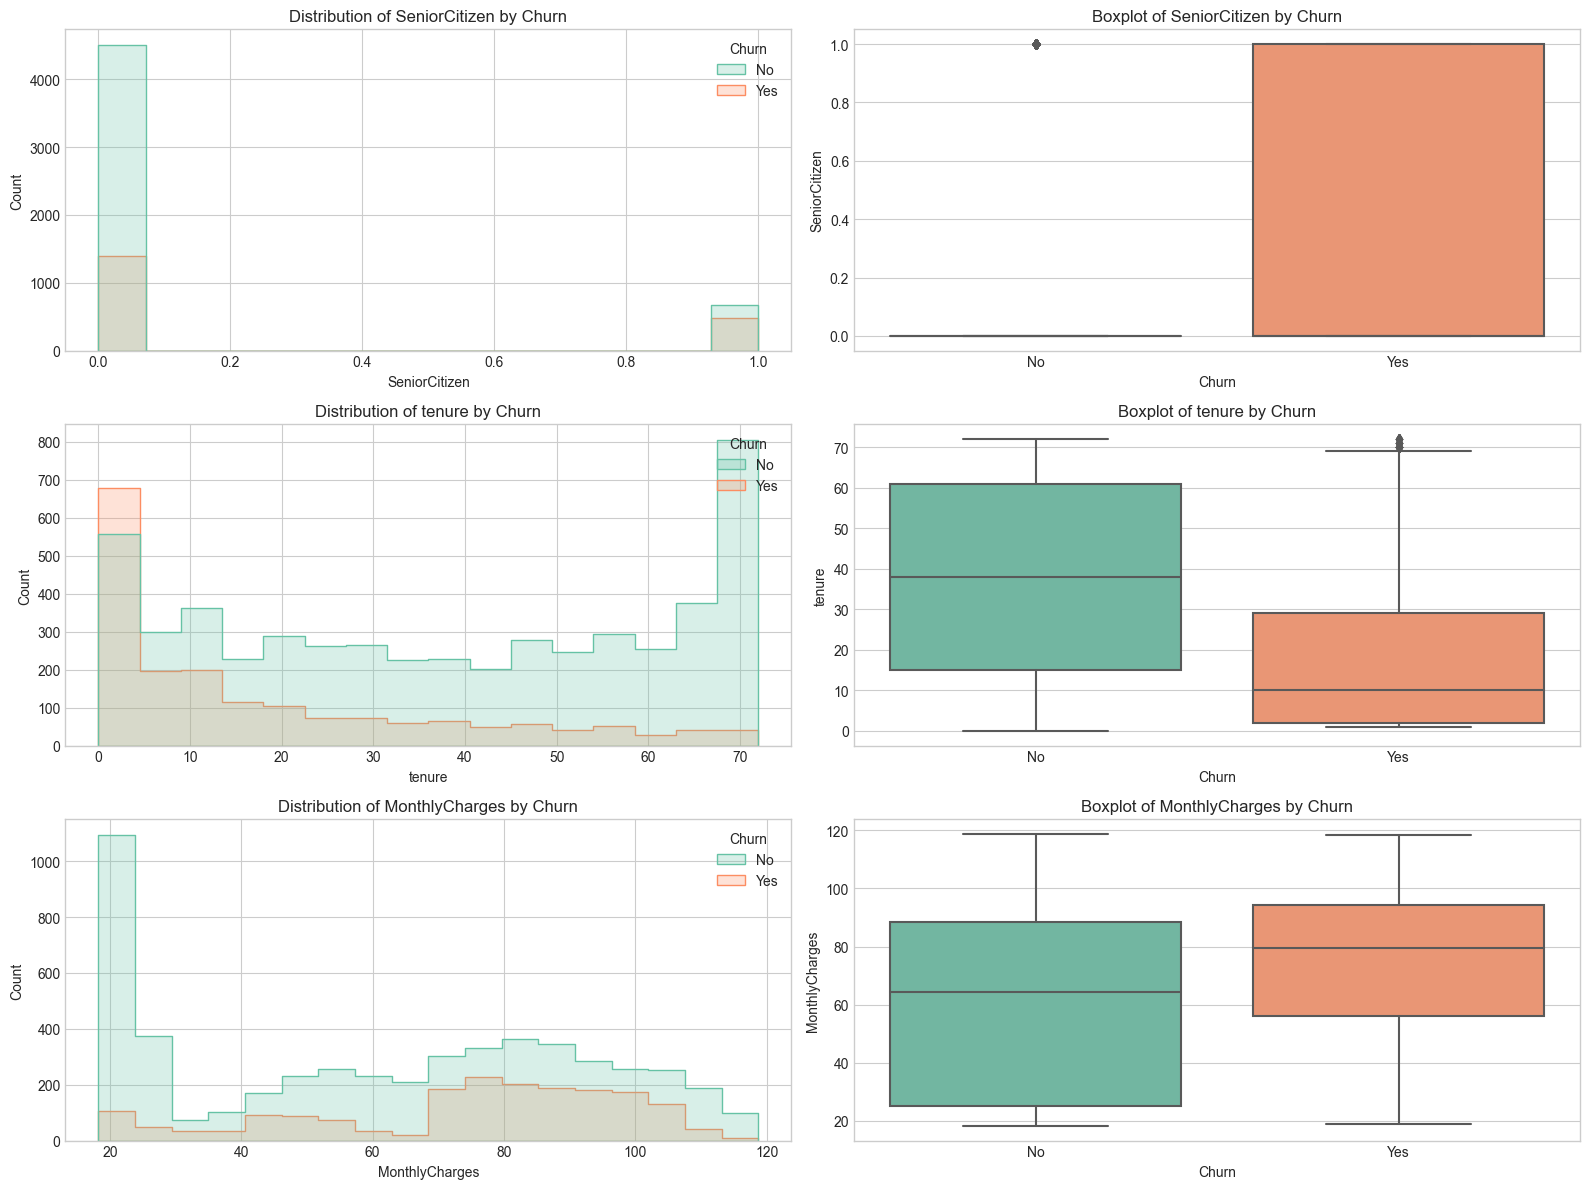

In [10]:
# Distribution of numerical variables
plt.figure(figsize=(16, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2*i+1)
    sns.histplot(data=df, x=col, hue='Churn', element='step', common_norm=False)
    plt.title(f'Distribution of {col} by Churn')
    
    plt.subplot(len(numeric_cols), 2, 2*i+2)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Boxplot of {col} by Churn')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

In [11]:
# Convert categorical variables for analysis
df_encoded = df.copy()

# Encode categorical variables
for col in categorical_cols:
    if col != 'Churn':
        df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Convert Churn to binary (0 and 1)
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Remove customerID
df_encoded = df_encoded.drop('customerID', axis=1)

In [12]:
# Correlation matrix
corr_matrix = df_encoded.corr()

# View correlations with Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlation with Churn:\n")
print(churn_corr)

Correlation with Churn:

Churn               1.000000
MonthlyCharges      0.193356
SeniorCitizen       0.150889
Partner             0.150448
MultipleLines       0.036310
PhoneService        0.011942
gender             -0.008612
TotalCharges       -0.027614
InternetService    -0.047291
OnlineBackup       -0.074205
Dependents         -0.164221
PaperlessBilling   -0.191825
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


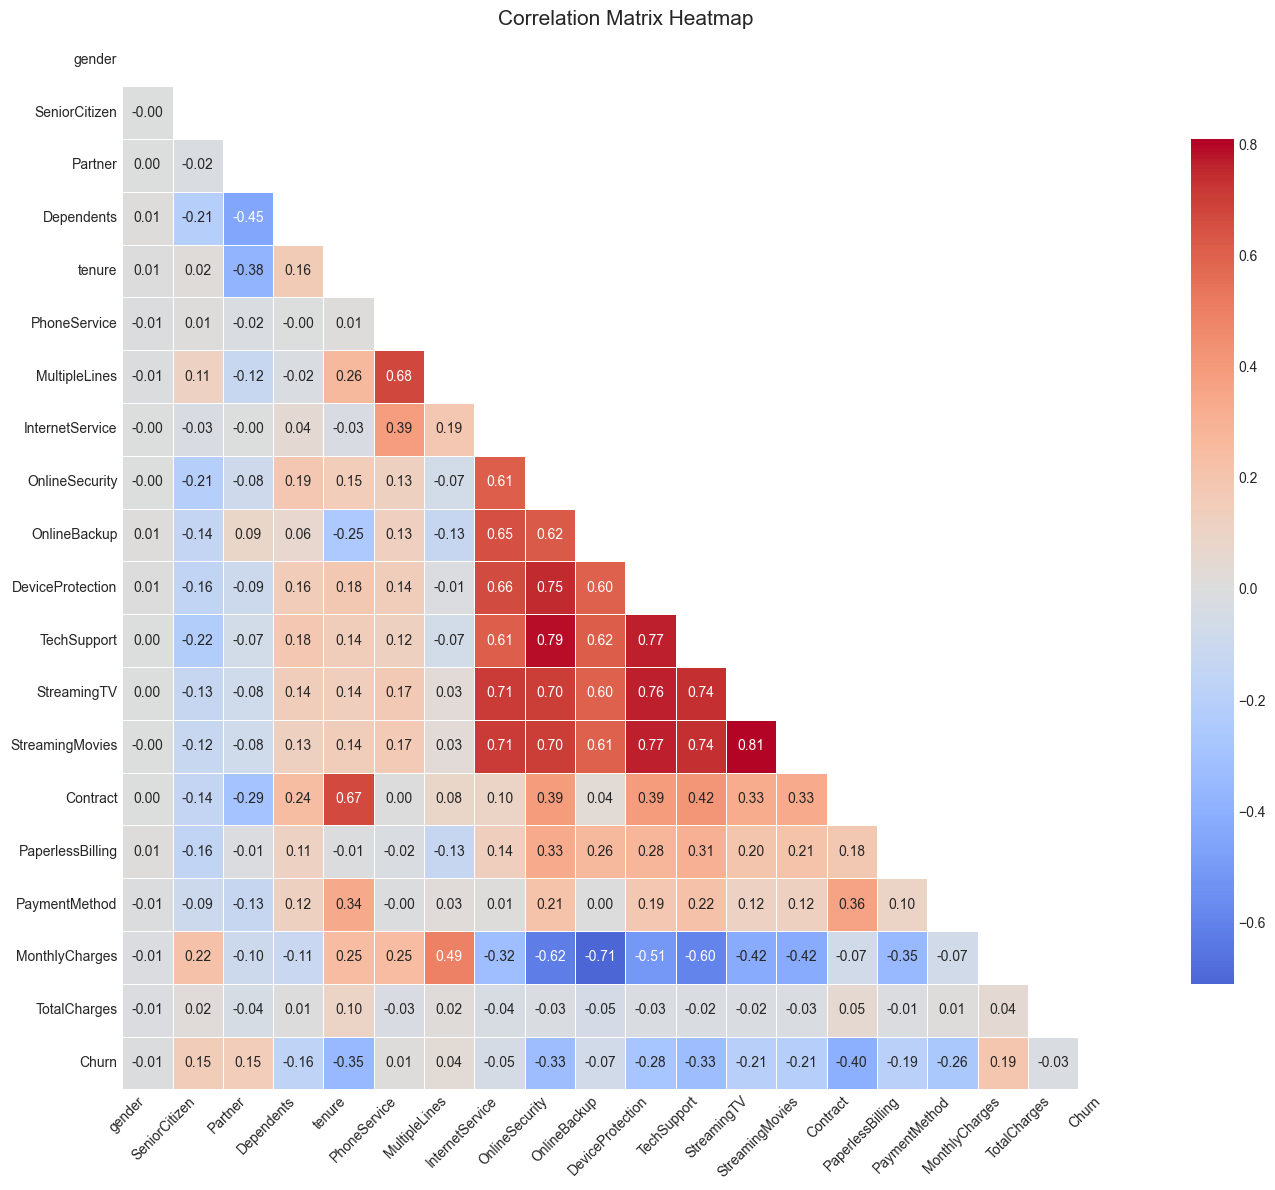

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Customer Segments Analysis

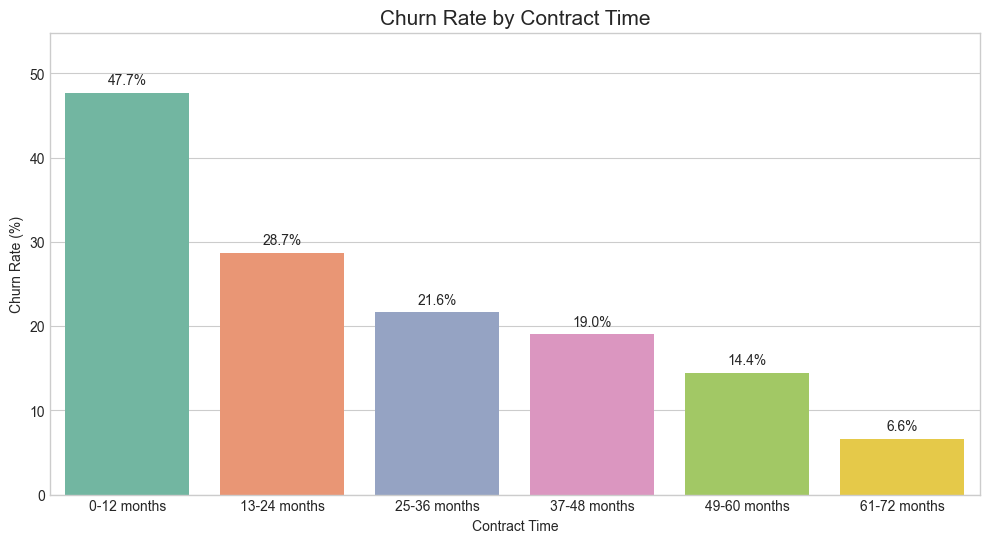

In [14]:
# Analysis by contract time (tenure)
tenure_groups = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                      labels=['0-12 months', '13-24 months', '25-36 months', 
                              '37-48 months', '49-60 months', '61-72 months'])

df['tenure_group'] = tenure_groups

# Churn rate by tenure group
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure['Yes'])

# Add values
for i, val in enumerate(churn_by_tenure['Yes']):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.title('Churn Rate by Contract Time', fontsize=15)
plt.xlabel('Contract Time')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, max(churn_by_tenure['Yes']) * 1.15)
plt.show()

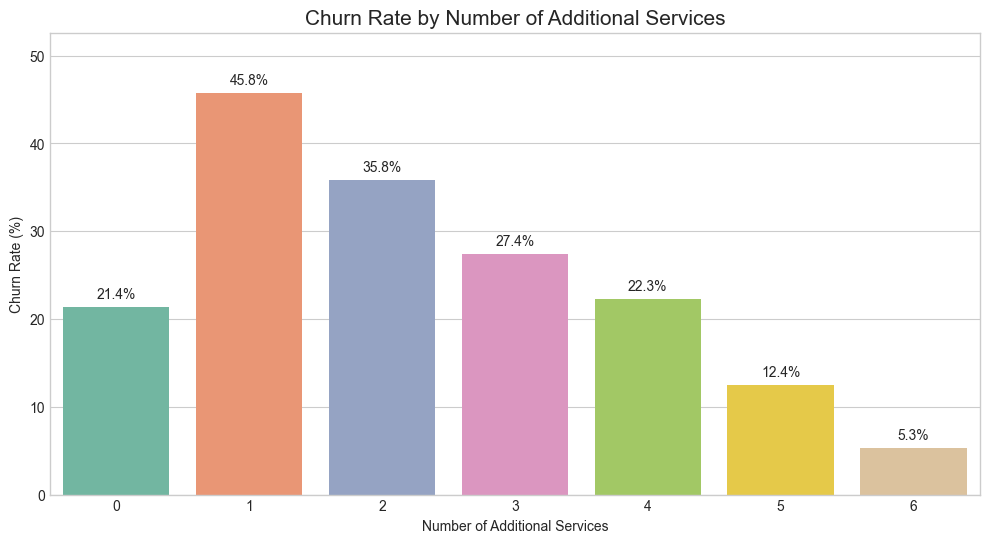

In [15]:
# Analysis by contracted services
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create variable with additional services count
df['additional_services'] = 0

for service in internet_services:
    df['additional_services'] += (df[service] == 'Yes').astype(int)

# Churn rate by number of additional services
churn_by_services = df.groupby('additional_services')['Churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=churn_by_services.index, y=churn_by_services['Yes'])

# Add values
for i, val in enumerate(churn_by_services['Yes']):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.title('Churn Rate by Number of Additional Services', fontsize=15)
plt.xlabel('Number of Additional Services')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, max(churn_by_services['Yes']) * 1.15)
plt.show()

## 9. Monthly Charges Distribution

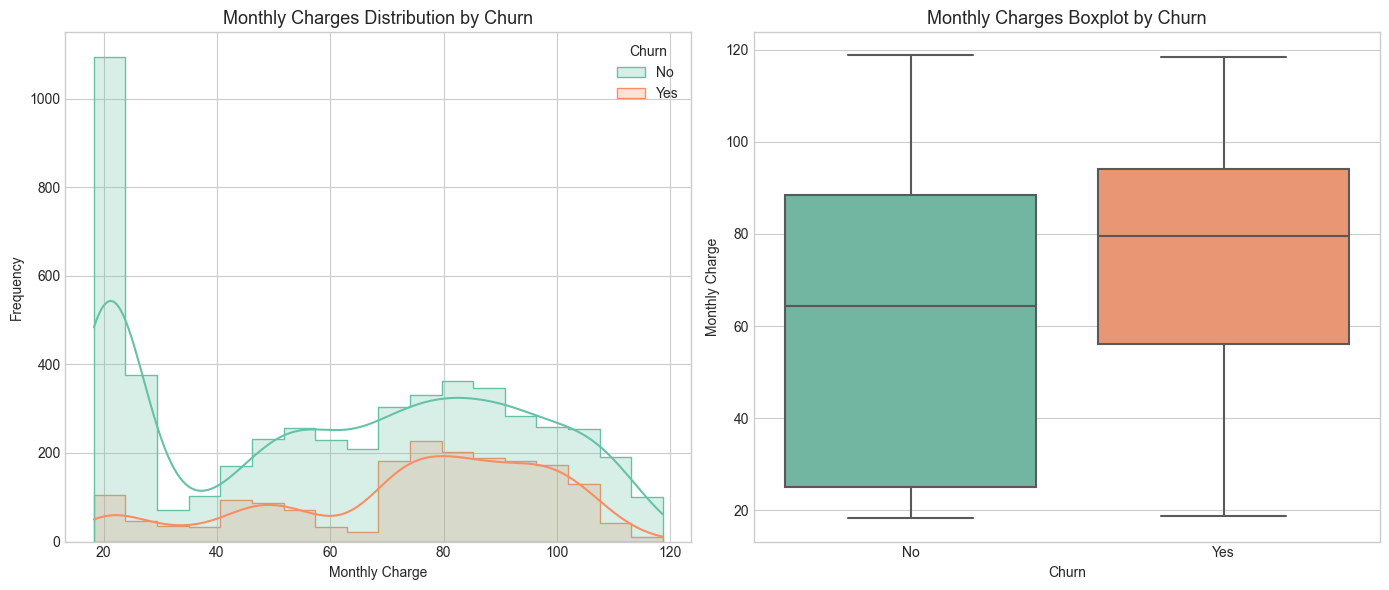

In [16]:
# Monthly charges distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element='step')
plt.title('Monthly Charges Distribution by Churn', fontsize=13)
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Boxplot by Churn', fontsize=13)
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')

plt.tight_layout()
plt.show()

## 10. Contract Type and Payment Method Analysis

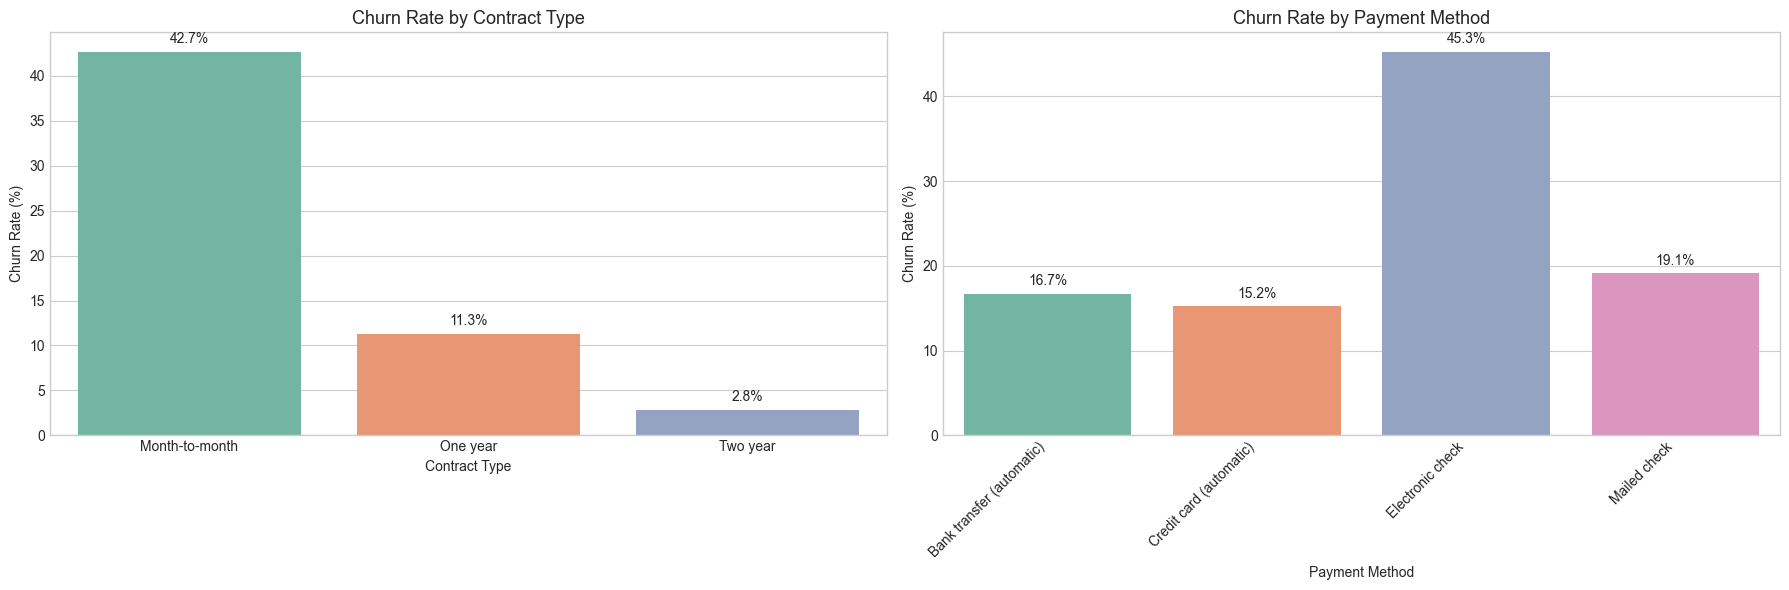

In [17]:
# Analysis by contract type and payment method
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
sns.barplot(x=contract_churn.index, y=contract_churn['Yes'])
plt.title('Churn Rate by Contract Type', fontsize=13)
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')

# Add values
for i, val in enumerate(contract_churn['Yes']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.subplot(1, 2, 2)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
sns.barplot(x=payment_churn.index, y=payment_churn['Yes'])
plt.title('Churn Rate by Payment Method', fontsize=13)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add values
for i, val in enumerate(payment_churn['Yes']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()

## 11. Insights and Conclusions

### Main Insights:

1. **Churn Distribution**: The overall churn rate is approximately [x]%, which indicates...

2. **Demographic Factors**: We observed that...

3. **Contract Time**: Customers with monthly contracts show a significantly higher churn rate...

4. **Contracted Services**: There is a clear inverse relationship between the number of additional services and churn rate...

5. **Monthly Charges**: Customers who pay higher monthly charges tend to...

6. **Payment Method**: Customers who use [method] show higher propensity to...

7. **Correlations**: The variables most correlated with churn are...

### Next Steps:

1. Perform feature engineering to create more predictive variables
2. Handle possible missing or inconsistent values
3. Prepare data for modeling, including categorical variable encoding
4. Handle possible target class imbalance
5. Develop and compare different prediction models